# Income Bracket Classifier

## Description

### Objective
`Make a Classification Model using Logistic Regression's Method and SVM to predict income bracket.`
### Problem Statement
`1. What are columns that able to affect the income bracket significantly ?`
<br>
`2. Which one is better between Logistic Regression and SVM to predict income bracket ?`
<br>
`3. How much data is wrongly predicted ?`
<br>
`4. How to improve the model prediction ?`

## Working Area
### 1. Import Libraries

In [994]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outliers handling
from feature_engine.outliers import Winsorizer

# Data Splitting
from sklearn.model_selection import train_test_split

# Numerical features scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Categorical features encoding
from sklearn.preprocessing import OrdinalEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# Ignore the warning notes
import warnings
warnings.filterwarnings("ignore")

### 2. Data Loading
Extracting dataset from Big Query, using following command to obtain the dataset with the precise criteria*:
<br>
`SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket`
<br>
`FROM bigquery-public-data.ml_datasets.census_adult_income`
<br>
`WHERE workclass != ' ?' AND hours_per_week < 100`
<br>
`LIMIT 32000`
<br>
and save is as 'Raw_census_adult_income` with csv format.
<br>
(*) note : Data criteria
<br>
column names : age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, and income_bracket.
<br>
workclass : anything but ' ?'.
<br>
hours_per_week : less than 100.
<br>
number of rows : 32000 ( unfortunately, the total number of dataset is less than 32000 ).

In [995]:
# Load the dataset and transform it into dataframe
df = pd.read_csv('Raw_census_adult_income.csv')

In [996]:
# Show the dataset head
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,21,United-States,<=50K


In [997]:
# Show the dataset tail
df.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30720,50,Self-emp-inc,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,70,Germany,<=50K
30721,21,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,70,United-States,<=50K
30722,32,Private,Some-college,10,Separated,Machine-op-inspct,Unmarried,Black,Female,0,0,70,United-States,<=50K
30723,39,Private,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,70,United-States,<=50K
30724,20,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,70,United-States,<=50K


### 3. Exploratory Data Analysis (EDA)
Since there is no ID / unique identifier for every row in the data, therefore duplicate checks won't be performed.

In [998]:
# Check numerical data distribution using central tendencies and skewness value
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000
mean,38.439512,10.129699,1105.785094,88.889959,40.946461
std,13.119665,2.562702,7497.027762,405.613208,11.987385
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [999]:
df.skew()

age                0.531668
education_num     -0.310258
capital_gain      11.787237
capital_loss       4.514917
hours_per_week     0.330749
dtype: float64

Statement :
<br>
Columns named age, capital_gain, and capital_loss are considered as skewed data distributions. Which mean the data distribution is concentrated to the left side of the distribution / close to minimum value from the corresponding data range.
<br>
While the rest of columns is considered as normal distribution which mean the data distribution is concentrated at the middle side of the distribution / close to every central centendies (mean, median, and mode). 

Text(0.5, 1.0, ' capital_loss distribution')

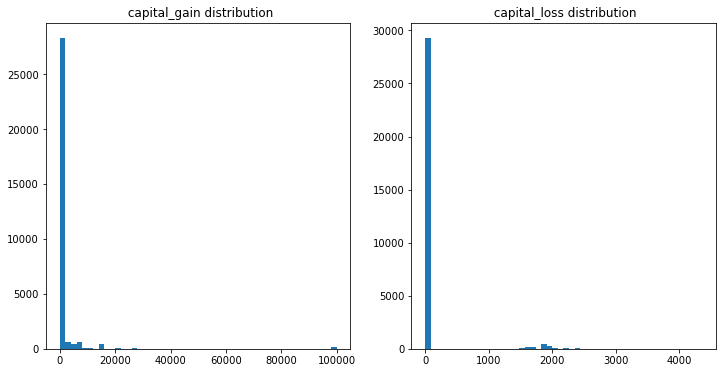

In [1000]:
# Check column distribution with extreme skewness value ( capital_loss and capital_gain )

plt.figure(figsize = (12,6))

# capital_gain plot
plt.subplot(1, 2, 1)
plt.hist(df['capital_gain'], bins = 50)
plt.title(' capital_gain distribution')

# capital_loss plot
plt.subplot(1, 2, 2)
plt.hist(df['capital_loss'], bins = 50)
plt.title(' capital_loss distribution')

Statement :
<br>
capital_gain and capital_loss distributions showing abnormal distribution where their Q3 is 0, yet the maximum value is 99999.

In [1001]:
# Check null / none data and format for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       30725 non-null  object
 3   education_num   30725 non-null  int64 
 4   marital_status  30725 non-null  object
 5   occupation      30725 non-null  object
 6   relationship    30725 non-null  object
 7   race            30725 non-null  object
 8   sex             30725 non-null  object
 9   capital_gain    30725 non-null  int64 
 10  capital_loss    30725 non-null  int64 
 11  hours_per_week  30725 non-null  int64 
 12  native_country  30725 non-null  object
 13  income_bracket  30725 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


Statement :
<br>
No null data found and each column is formatted in the correct type.

In [1002]:
# Separate the categorical and numerical data
num_raw = df.select_dtypes(include=np.number).columns.tolist()
cat_raw = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of column
print('Numerical column list :', num_raw)
print('Categorical column list :', cat_raw)

Numerical column list : ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical column list : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income_bracket']


In [1003]:
# Check the categorical cardinality
df[cat_raw].nunique()

workclass          8
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income_bracket     2
dtype: int64

Statement :
<br>
education, occupation, and native_country have high cardinality compared to other columns. Therefore, cardinality compression is needed for the aforementioned columns.

In [1004]:
# Check every column contents
df.workclass.unique() # Workclass column

array([' Never-worked', ' Private', ' Self-emp-not-inc', ' Self-emp-inc',
       ' State-gov', ' Federal-gov', ' Local-gov', ' Without-pay'],
      dtype=object)

In [1005]:
df.education.unique() # Education column

array([' Some-college', ' 12th', ' HS-grad', ' Bachelors', ' 9th',
       ' 10th', ' 11th', ' 5th-6th', ' 7th-8th', ' Masters', ' Assoc-voc',
       ' Assoc-acdm', ' Prof-school', ' Doctorate', ' 1st-4th',
       ' Preschool'], dtype=object)

In [1006]:
df.marital_status.unique() # Marital_status column

array([' Never-married', ' Married-civ-spouse', ' Divorced', ' Separated',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

In [1007]:
df.occupation.unique() # Occupation column

array([' ?', ' Sales', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Tech-support', ' Other-service', ' Prof-specialty',
       ' Exec-managerial', ' Farming-fishing', ' Priv-house-serv',
       ' Protective-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Machine-op-inspct'], dtype=object)

In [1008]:
df.relationship.unique() # Relationship column

array([' Own-child', ' Wife', ' Husband', ' Unmarried', ' Not-in-family',
       ' Other-relative'], dtype=object)

In [1009]:
df.race.unique() # Race column

array([' White', ' Asian-Pac-Islander', ' Black', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [1010]:
df.sex.unique() # Sex column

array([' Male', ' Female'], dtype=object)

In [1011]:
df.native_country.unique() # Native_country column

array([' United-States', ' ?', ' Dominican-Republic', ' Canada', ' South',
       ' Cuba', ' Mexico', ' Vietnam', ' Philippines', ' India', ' Italy',
       ' Jamaica', ' El-Salvador', ' Trinadad&Tobago', ' Guatemala',
       ' England', ' Germany', ' Puerto-Rico', ' Peru', ' Yugoslavia',
       ' Poland', ' Iran', ' Taiwan', ' Hong', ' Japan', ' Thailand',
       ' Haiti', ' China', ' Ecuador', ' Columbia', ' Greece', ' France',
       ' Hungary', ' Laos', ' Outlying-US(Guam-USVI-etc)', ' Portugal',
       ' Nicaragua', ' Honduras', ' Scotland', ' Ireland', ' Cambodia',
       ' Holand-Netherlands'], dtype=object)

In [1012]:
df.income_bracket.unique() # Income_bracket column

array([' <=50K', ' >50K'], dtype=object)

Statement :
<br>
column native_country and occupation contaminated with ' ?' value that is considered as null value of data. Therefore, extermination required.

In [1013]:
# Check the data distribution in high cardinality columns

# Check the distribution in native_country column
df['native_country'].value_counts(sort = True, ascending = False)

 United-States                 27511
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Iran                             42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

Statement :
<br>
Since the United-States dominating the native_country column ( 27511 out of 30725 data ), therefore the native_country column will be sepatarated to:
<br>
1. US
2. Non US

In [1014]:
# Check the distribution in education column
df['education'].value_counts(sort = True, ascending = False)

 HS-grad         9969
 Some-college    6777
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          574
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64

Statement :
<br>
The data input is very inconsistent, where the data about year of education before college was divided into several range such as:
<br>
1st-4th, 7th-8th, ect.
<br>
Therefore, the data will be transformed into last education level that had been passed.
<br>
1. Preschool (Preschool, 1st-4th, 5th-6th)
2. Elementary (7th-8th, 9th)
3. JHS (10th, 11th, 12th)*
4. SHS (HS-grad)*
5. College (Some-college, Assoc-voc, Assoc-acdm)
6. Bachelors
7. Post_Grad (Masters, Prof-school)
8. Doctorate
<br>
*note : JHS = Junior High School, SNS = Senior High School

In [1015]:
# Check the distribution in occupation column
df['occupation'].value_counts(sort = True, ascending = False)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 ?                       7
Name: occupation, dtype: int64

Statement :
<br>
Job with the same job description will be merged.
<br>
1. Professional (prof-speciality)
2. Office_worker (Exec-managerial, Adm-clerical, Sales)
3. Operator (Machine-op-inspct, Transport-moving)
4. Security (Protective-serv, Armed-Forces)
5. Technician (Craft-repair, Tech-support)
6. Household_assistant (Handlers-cleaners, Priv-house-serv)
7. Farming-fishing
8. Other-service

### 4. Data Preprocessing - Data Cleaning
Since Logistic Regression and SVM is basically a linear basis function, therefore feature selection will based on the linear correlation between features and target.

In [1016]:
# Remove all rows that contain ' ?' in either native_country column and occupation or both.
df = df[ ~(df['native_country'] == ' ?') & ~(df['occupation'] == ' ?') ]

# Check the size of new dataframe
df.shape

(30162, 14)

In [1017]:
# Reduce cardinality in native_country column
df['native_country'] = df['native_country'].replace(to_replace=r"^(.(?<!United-States))*?$", value='non US',regex=True)
df['native_country'] = df['native_country'].replace(to_replace=r"^(.(?<!non US))*?$", value='US',regex=True)

In [1018]:
# Reduce cardinality in education column
df = df.replace({
    'education':{
        ' Preschool' : 'Preschool',
        ' 1st-4th' : 'Preschool',
        ' 5th-6th' : 'Preschool',
        ' 7th-8th' : 'Elementary',
        ' 9th' : 'Elementary',
        ' 10th' : 'JHS',
        ' 11th' : 'JHS',
        ' 12th' : 'JHS',
        ' HS-grad' : 'SHS',
        ' Some-college' : 'College',
        ' Assoc-voc' : 'College',
        ' Assoc-acdm' : 'College',
        ' Prof-school' : 'Post_Grad',
        ' Masters' : 'Post_Grad',
    }
})

In [1019]:
# Reduce cardinality in occupation column
df = df.replace({
    'occupation':{
        ' Prof-specialty' : 'Professional',
        ' Exec-managerial' : 'Office_worker',
        ' Adm-clerical' : 'Office_worker',
        ' Sales' : 'Office_worker',
        ' Machine-op-inspct' : 'Operator',
        ' Transport-moving' : 'Operator',
        ' Protective-serv' : 'Security',
        ' Armed-Forces' : 'Security',
        ' Craft-repair' : 'Technician',
        ' Tech-support' : 'Technician',
        ' Handlers-cleaners' : 'Household_assistant',
        ' Priv-house-serv' : 'Household_assistant'
    }
})

In [1020]:
# Recheck categorical data cardinality
df[cat_raw].nunique()

workclass         7
education         8
marital_status    7
occupation        8
relationship      6
race              5
sex               2
native_country    2
income_bracket    2
dtype: int64

Statement :
<br>
All categorical columns cardinality is already less than 10.

### 4. Data Preprocessing - Inference Model

In [1021]:
# Get Data for Inference Model
data_inf = df.sample(10, random_state = 1) # 10 rows will be used as inference model

# Remove Inference-Set from Dataset
data_train_test = df.drop(data_inf.index)

In [1022]:
# Reset index for every data set in order to minimize the probability of error for the next code command
data_train_test.reset_index(drop = True , inplace = True)
data_inf.reset_index(drop = True , inplace = True)

### 4. Data Preprocessing - Data Splitting

In [1023]:
# Splitting the Features and Target
X = data_train_test.drop(['income_bracket'], axis = 1) # Features
y = pd.DataFrame(data_train_test['income_bracket']) # Target

In [1024]:
# Splitting the features and target to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) # 20% of the data will be the test set

In [1025]:
# Compare the data distribution and cardinality before and after splitting between base dataset and train dataset
# Check the numerical columns distribution based on skewness value
print('Base Dataset Skewness')
print(df.skew(), '\n' )
print('Train Dataset Skewness')
print(X_train.skew())

Base Dataset Skewness
age                0.530228
education_num     -0.305379
capital_gain      11.902682
capital_loss       4.526380
hours_per_week     0.330869
dtype: float64 

Train Dataset Skewness
age                0.534302
education_num     -0.311754
capital_gain      11.637829
capital_loss       4.487798
hours_per_week     0.341481
dtype: float64


Statement :
<br>
There is no extreme difference been found between base dataset and training dataset based on skewness value of data distribution. Therefore, we can conclude that the training set distribution is able to represent the base dataset.

In [1026]:
# Check the numerical columns central tendencies
print('Base Dataset Central Tendencies')
print(df.describe(), '\n')
print('Train Dataset Central Tendencies')
print(X_train.describe())

Base Dataset Central Tendencies
                age  education_num  capital_gain  capital_loss  hours_per_week
count  30162.000000   30162.000000  30162.000000  30162.000000    30162.000000
mean      38.437902      10.121312   1092.007858     88.372489       40.931238
std       13.134665       2.549995   7406.346497    404.298370       11.979984
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      13.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000 

Train Dataset Central Tendencies
                age  education_num  capital_gain  capital_loss  hours_per_week
count  24121.000000   24121.000000  24121.000000  24121.000000    24121.000000
mean      38.439285      10.124953   1128.297998     89.455578  

Statement :
<br>
Same as skewness value, no extreme difference between base dataset with train dataset for every statistical calculation performed (minimum & maximum value, standard deviation, Q1, Q2 (median), Q3, and mean (average)).
<br>
Therefore, we can conclude that the training set distribution is able to represent the base numerical dataset.

In [1027]:
# Compare the cardinality between base and train set
print('Base Dataset Cardinalities')
print(df[cat_raw].nunique(), '\n')
print('Train Dataset Cardinalities')
cat_raw_X = np.delete(cat_raw, -1) # Make a columns list without target column
print(X_train[cat_raw_X].nunique(), '\n')

Base Dataset Cardinalities
workclass         7
education         8
marital_status    7
occupation        8
relationship      6
race              5
sex               2
native_country    2
income_bracket    2
dtype: int64 

Train Dataset Cardinalities
workclass         7
education         8
marital_status    7
occupation        8
relationship      6
race              5
sex               2
native_country    2
dtype: int64 



Statement :
<br>
The cardinalities of base and train dataset show no differences.
<br>
Therefore, we can conclude that the training set distribution is able to represent the base categorical dataset.

### 4. Data Preprocessing - Outliers Handling

In [1028]:
# Make a function to calculate the limitation of outliers and show the most extreme results

## Normal Distribution Limitation
def Nor_LLUL(df, variable):
    LL = df[variable].mean() - 3 * df[variable].std() # Lower Limit
    UL = df[variable].mean() + 3 * df[variable].std() # Upper Limit
    return LL, UL

## Skewed Distribution Limitation
def Skew_LLUL(df, variable, multiplier = 1.5):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - multiplier * IQR
    UL = Q3 + multiplier * IQR
    return LL, UL

# Show the most extreme results for outliers
def Show_LLUL(df, variable, LL, UL):
    out_df = df[(df[variable] > UL) | (df[variable] < LL)]
    out_df.sort_values(variable, ascending = False, inplace = True)
    out_df.reset_index(inplace = True)
    print(round(out_df.shape[0] / df.shape[0] * 100, 2), '% is considered as outliers')
    return out_df.iloc[np.r_[0:6, -6:-1]]

In [1029]:
# Check outliers for every numerical column in train set
# List of columns with normal distribution based on skewness value: education_num, hours_per_week
# List of columns with skewed distribution based on skewness value: age, capital_gain, capital_loss

# Calculate the limitation for age column
age_LL, age_UL = Skew_LLUL(X_train, 'age')

# Calculate the limitation for education_num column
education_num_LL, education_num_UL = Nor_LLUL(X_train, 'education_num')

# Calculate the limitation for capital_gain column
capital_gain_LL, capital_gain_UL = Skew_LLUL(X_train, 'capital_gain')

# Calculate the limitation for capital_loss column
capital_loss_LL, capital_loss_UL = Skew_LLUL(X_train, 'capital_loss')

# Calculate the limitation for hours_per_week column
hours_per_week_LL, hours_per_week_UL = Nor_LLUL(X_train, 'hours_per_week')

In [1030]:
# Check the outliers for every numerical column to make sure whether it's reasonable or not

# Show the age column outliers
Show_LLUL(X_train, 'age', age_LL, age_UL)

0.58 % is considered as outliers


,index,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,20375,90,Private,JHS,7,Never-married,Household_assistant,Own-child,White,Male,0,0,40,US
1,23744,90,Private,Bachelors,13,Married-civ-spouse,Office_worker,Husband,White,Male,0,0,45,US
2,14992,90,Private,SHS,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,US
3,3236,90,Local-gov,College,12,Married-civ-spouse,Office_worker,Husband,Asian-Pac-Islander,Male,0,0,20,non US
4,17134,90,Private,JHS,6,Married-civ-spouse,Office_worker,Husband,White,Male,0,0,40,US
5,16800,90,Private,Bachelors,13,Never-married,Professional,Not-in-family,Asian-Pac-Islander,Male,0,0,40,US
133,5122,76,Local-gov,College,10,Widowed,Office_worker,Not-in-family,White,Female,0,0,30,US
134,3366,76,Private,College,10,Divorced,Office_worker,Not-in-family,White,Female,0,0,20,US
135,959,76,Private,SHS,9,Widowed,Other-service,Unmarried,White,Female,0,0,33,US
136,4071,76,Private,SHS,9,Married-civ-spouse,Office_worker,Husband,White,Male,1424,0,24,US


Statement :
<br>
Since the number of outliers data is only 0.58% of the total data, outliers handling is not required.

In [1031]:
# Show the education_num outliers
Show_LLUL(X_train, 'education_num', education_num_LL, education_num_UL)

0.63 % is considered as outliers


,index,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,26463,52,Private,Preschool,2,Married-civ-spouse,Office_worker,Husband,White,Male,0,0,50,US
1,20126,31,Private,Preschool,2,Married-civ-spouse,Household_assistant,Husband,White,Male,0,0,40,non US
2,11418,54,Private,Preschool,2,Married-civ-spouse,Technician,Husband,Black,Male,0,0,40,non US
3,12953,50,Private,Preschool,2,Married-spouse-absent,Technician,Unmarried,White,Male,0,0,40,US
4,20131,57,Private,Preschool,2,Married-civ-spouse,Household_assistant,Husband,White,Male,0,0,40,non US
5,3667,67,Self-emp-not-inc,Preschool,2,Widowed,Other-service,Not-in-family,Black,Female,0,0,20,US
145,24691,75,Private,Preschool,1,Never-married,Household_assistant,Not-in-family,Asian-Pac-Islander,Female,0,0,48,non US
146,2194,71,Private,Preschool,1,Widowed,Technician,Unmarried,Black,Male,0,0,10,US
147,27214,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,non US
148,22073,59,Private,Preschool,1,Never-married,Operator,Not-in-family,White,Male,0,0,40,non US


Statement :
<br>
Since the number of outliers data is only 0.63% of the total data, outliers handling is not required.

In [1032]:
# Show the capital_gain column outliers
Show_LLUL(X_train, 'capital_gain', capital_gain_LL, capital_gain_UL)

8.49 % is considered as outliers


,index,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,17388,71,Self-emp-inc,Post_Grad,14,Married-civ-spouse,Office_worker,Husband,White,Male,99999,0,40,US
1,22712,57,Self-emp-not-inc,College,10,Married-civ-spouse,Office_worker,Husband,White,Male,99999,0,45,US
2,17747,43,Self-emp-inc,Post_Grad,15,Married-civ-spouse,Office_worker,Husband,White,Male,99999,0,40,US
3,28899,57,Self-emp-inc,Post_Grad,15,Married-civ-spouse,Professional,Husband,White,Male,99999,0,60,US
4,27981,47,Private,Post_Grad,14,Married-civ-spouse,Office_worker,Husband,White,Male,99999,0,55,US
5,26810,50,Private,College,10,Married-civ-spouse,Office_worker,Husband,White,Male,99999,0,50,US
2041,4065,77,Self-emp-not-inc,SHS,9,Never-married,Operator,Not-in-family,White,Male,401,0,20,US
2042,7721,38,State-gov,SHS,9,Never-married,Other-service,Unmarried,Black,Female,114,0,38,US
2043,27764,33,Private,Elementary,5,Divorced,Technician,Unmarried,White,Male,114,0,55,US
2044,22914,39,Private,College,10,Divorced,Office_worker,Unmarried,White,Female,114,0,45,US


Statement :
<br>
Since the number of outliers is over than 5% than the number of total data, outliers handling is required.
<br>
But, since EDA we already know that the data distribution in capital_gain column is abnormal and the number of total outliers makes it worse. With that in mind, the capital_gain column will be removed.

In [1033]:
# Remove the capital_gain column
X_train = X_train.drop(['capital_gain'], axis = 1)

In [1034]:
# Show the capital_loss column outliers
Show_LLUL(X_train, 'capital_loss', capital_loss_LL, capital_loss_UL)

4.79 % is considered as outliers


,index,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_loss,hours_per_week,native_country
0,1549,82,Private,SHS,9,Widowed,Office_worker,Not-in-family,White,Female,4356,18,US
1,16253,41,Private,College,10,Separated,Professional,Own-child,White,Female,3900,40,US
2,23295,34,Private,SHS,9,Divorced,Other-service,Unmarried,White,Female,3770,45,US
3,16460,68,Federal-gov,SHS,9,Divorced,Professional,Not-in-family,White,Female,3683,40,US
4,3834,74,State-gov,Doctorate,16,Never-married,Professional,Other-relative,White,Female,3683,20,US
5,6950,45,Private,Doctorate,16,Divorced,Professional,Unmarried,Black,Female,3004,35,US
1149,2476,68,Private,SHS,9,Married-civ-spouse,Operator,Husband,White,Male,419,12,US
1150,3788,49,Local-gov,Post_Grad,14,Widowed,Professional,Unmarried,White,Female,323,20,US
1151,16377,36,Private,Bachelors,13,Divorced,Professional,Unmarried,Black,Female,213,40,US
1152,23896,37,Private,Post_Grad,14,Divorced,Office_worker,Unmarried,White,Female,213,45,US


Statement :
<br>
Since the number of outliers is less than 5% than the number of total data, outliers handling is not required.

In [1035]:
# Show the hours_per_week column outliers
Show_LLUL(X_train, 'hours_per_week', hours_per_week_LL, hours_per_week_UL)

1.45 % is considered as outliers


,index,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_loss,hours_per_week,native_country
0,1309,67,Private,Post_Grad,14,Never-married,Professional,Not-in-family,White,Male,0,99,US
1,1364,44,Private,Post_Grad,15,Divorced,Professional,Not-in-family,White,Female,0,99,US
2,1880,39,Private,Bachelors,13,Married-civ-spouse,Operator,Husband,White,Male,0,99,US
3,539,37,Private,SHS,9,Married-civ-spouse,Technician,Husband,White,Male,0,99,US
4,801,44,Self-emp-not-inc,College,12,Married-civ-spouse,Other-service,Wife,White,Female,0,99,US
5,1354,34,Federal-gov,Doctorate,16,Never-married,Professional,Not-in-family,White,Female,0,99,US
344,1952,82,Private,Elementary,4,Married-civ-spouse,Household_assistant,Husband,White,Male,0,2,US
345,1313,67,Self-emp-not-inc,Post_Grad,14,Widowed,Professional,Not-in-family,White,Male,0,2,US
346,2128,27,Private,SHS,9,Never-married,Operator,Other-relative,White,Male,0,1,US
347,2089,21,Private,SHS,9,Never-married,Operator,Own-child,Black,Male,0,1,US


Statement :
<br>
Since the number of outliers data is only 1.45% of the total data, outliers handling is not required.

### 4. Data Preprocessing - Features Scaling and Encoding

In [1036]:
# Make a new column list
num_raw_2 = np.delete(num_raw, 2) # Numerical
cat_raw_2 = np.delete(cat_raw, -1) # Categorical

# Split train test columns by type

# Numerical columns
X_train_num = X_train[num_raw_2]
X_test_num = X_test[num_raw_2]

# Categorical columns
X_train_cat = X_train[cat_raw_2]
X_test_cat = X_test[cat_raw_2]


In [1037]:
# Check the numerical data distribution using skewness value
X_train_num.skew()

age               0.534302
education_num    -0.311754
capital_loss      4.487798
hours_per_week    0.341481
dtype: float64

Statement :
<br>
Numerical features will be broken down into columns that have a normal distribution and a skewed distribution for scaling purposes.
<br>
age, capital_loss = skewed distribution ( less than -0.5 or over than 0.5 )
<br>
education_num, hours_per_week = normal distribution ( between -0.5 to 0.5 )

In [1038]:
# Make a new column list
num_nor = ['education_num', 'hours_per_week'] # Normal distribution
num_skew = ['age', 'capital_loss'] # Skeweed distribution

X_train_num_nor = X_train_num[num_nor]
X_train_num_skew = X_train_num[num_skew]
X_test_num_nor = X_test_num[num_nor]
X_test_num_skew = X_test_num[num_skew]

In [1039]:
# Define a function for scaling
skew_scaler = MinMaxScaler()
nor_scaler = StandardScaler()

# Scaler trainig
nor_scaler.fit(X_train_num_nor)
skew_scaler.fit(X_train_num_skew)

# Making new dataset that contain scaling values
X_train_num_nor_scaled = nor_scaler.transform(X_train_num_nor)
X_train_num_skew_scaled = skew_scaler.transform(X_train_num_skew)
X_test_num_nor_scaled = nor_scaler.transform(X_test_num_nor)
X_test_num_skew_scaled = skew_scaler.transform(X_test_num_skew)

In [1040]:
# Make an encoding function
encoder = OrdinalEncoder(categories = [[' Self-emp-not-inc', ' Private', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov', ' Without-pay'],
                                      ['Preschool', 'Elementary', 'JHS', 'SHS', 'College', ' Bachelors', 'Post_Grad', ' Doctorate'],
                                      [' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated', ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
                                      [' Farming-fishing', 'Office_worker', ' Other-service', 'Operator', 'Technician', 'Household_assistant', 'Professional', 'Security'],
                                      [' Husband', ' Own-child', ' Other-relative', ' Unmarried', ' Not-in-family', ' Wife'],
                                      [' White', ' Black', ' Asian-Pac-Islander', ' Other', ' Amer-Indian-Eskimo'],
                                      [' Male', ' Female'],
                                      ['US', 'non US']])
encoder.fit(X_train_cat)

# Making new dataset that contain encoding values
X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [1041]:
# Combine the numerical and categorical columns
X_train_num_final = np.concatenate([X_train_num_nor_scaled, X_train_num_skew_scaled], axis=1)
X_train_cat_final = X_train_cat_encoded
X_train_final = np.concatenate([X_train_num_nor_scaled, X_train_num_skew_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_nor_scaled, X_test_num_skew_scaled, X_test_cat_encoded], axis=1)

In [1042]:
# Making dataframe from the scaled and encoded data
columns_all = np.concatenate([num_nor, num_skew, cat_raw_2])
columns_num = np.concatenate([num_nor, num_skew])
X_train_final_df = pd.DataFrame(X_train_final, columns = columns_all)
X_train_num_final = X_train_final_df[columns_num]
X_train_cat_final = X_train_final_df[cat_raw_2]
X_test_final_df = pd.DataFrame(X_test_final, columns = columns_all)

In [1043]:
# Convert dataframe to array
y_train.to_numpy()

array([[' <=50K'],
       [' <=50K'],
       [' <=50K'],
       ...,
       [' <=50K'],
       [' <=50K'],
       [' >50K']], dtype=object)

In [1044]:
# Check the correlation between train set with test set for features selection

# ANOVA's method to look for significant differences between numerical features and categorical target
select_ANOV = SelectKBest(score_func=f_classif, k = 4)
num_list = select_ANOV.fit(X_train_num_final, y_train)
num_result = pd.Series(num_list.scores_)
num_result.index = X_train_num_final.columns
num_result.sort_values(ascending = False)

education_num     3121.135794
age               1548.777307
hours_per_week    1342.639626
capital_loss       573.944410
dtype: float64

Statement :
<br>
3 columns with highest scores will be picked as numerical features.

In [1045]:
# Chi Square Method to seacrh the most relevant categorical features
select_chi = SelectKBest(score_func = chi2, k = 8)
cat_list = select_chi.fit(X_train_cat_final, y_train)
cat_result = pd.Series(cat_list.scores_)
cat_result.index = X_train_cat_final.columns
cat_result.sort_values(ascending = False)

marital_status    3205.547030
relationship      2771.933560
education         1239.679964
sex                780.380522
race               198.829648
occupation         190.629488
workclass           80.833586
native_country      41.172785
dtype: float64

Statement :
<br>
3 columns with highest scores will be picked as categorical features.

In [1046]:
# Make final dataframe that contains the most influential column for train and test set
final_features = ['education_num' , 'age' , 'hours_per_week' , 'marital_status' , 'relationship', 'education']
X_train_fix = X_train_final_df[final_features]
X_test_fix = X_test_final_df[final_features]

#### 5. Model Definition

In [1047]:
# Logistic Regression Model
logreg_model = LogisticRegression()

# SVM Model
SVM_model = SVC(kernel = 'rbf', random_state = 1)

#### 6. Model Training

In [1048]:
# Logistic Regression Training
logreg_model.fit(X_train_fix , y_train)

# SVM Training
SVM_model.fit(X_train_fix, y_train)

SVC(random_state=1)

#### 7. Model Evaluation

In [1049]:
# Predict using Logistic Regression
logreg_pred_train = logreg_model.predict(X_train_fix)
logreg_pred_test = logreg_model.predict(X_test_fix)

# Predict using SVM
SVM_pred_train = SVM_model.predict(X_train_fix)
SVM_pred_test = SVM_model.predict(X_test_fix)

In [1050]:
# Compare the models accuracy
print('Logistic Regression Model')
print('Train Accuracy Score : ',round(accuracy_score(y_train,logreg_pred_train) * 100,2),'%')
print('Test Accuracy Score : ',round(accuracy_score(y_test,logreg_pred_test) * 100,2),'%')
print('')
print('SVM Model Accuracy')
print('Train Accuracy Score : ',round(accuracy_score(y_train,SVM_pred_train) * 100,2),'%')
print('Test Accuracy Score : ',round(accuracy_score(y_test,SVM_pred_test) * 100,2),'%')

Logistic Regression Model
Train Accuracy Score :  81.28 %
Test Accuracy Score :  80.92 %

SVM Model Accuracy
Train Accuracy Score :  81.73 %
Test Accuracy Score :  81.51 %


Statement :
<br>
Logistic Regression and SVM Model both show a fairly high accuracy above 70%, and has a very small difference gap ( less than 1% ). Therefore, for the time being we can conclude that both of the models have a good-fit type.

Logistic Regression Train Confusion Matrix


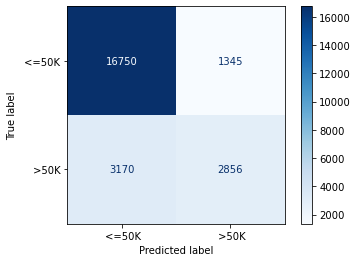

In [1051]:
# Compare the models confusion matrix
print('Logistic Regression Train Confusion Matrix')
disp = plot_confusion_matrix(logreg_model, X_train_fix, y_train, cmap='Blues')

SVM Train Confusion Matrix


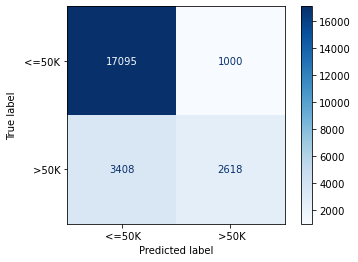

In [1052]:
print('SVM Train Confusion Matrix')
disp = plot_confusion_matrix(SVM_model, X_train_fix, y_train, cmap='Blues')

Logistic Regression Test Confusion Matrix


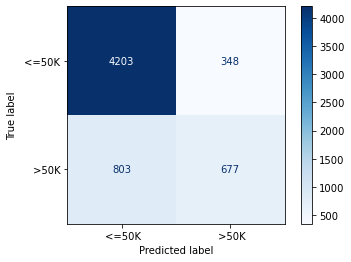

In [1053]:
print('Logistic Regression Test Confusion Matrix')
disp = plot_confusion_matrix(logreg_model, X_test_fix, y_test, cmap='Blues')

SVM Train Confusion Matrix


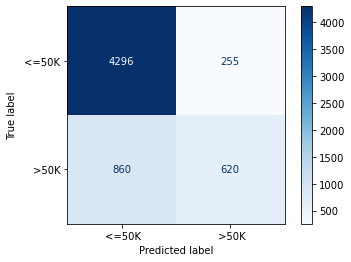

In [1054]:
print('SVM Train Confusion Matrix')
disp = plot_confusion_matrix(SVM_model, X_test_fix, y_test, cmap='Blues')

Statement :
<br>
Confusion Matrix for train test set for every model shows that there is an imbalance of prediction's composition. Target's test and train set is dominated by `<=50K`.
<br>
Check using F1 score is needed.

In [1055]:
# Logistic Regression Model's Report
print('Logistic Regression')
print('Train set report')
print(classification_report(y_train,logreg_pred_train))
print('Test set report')
print(classification_report(y_test,logreg_pred_test))

Logistic Regression
Train set report
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88     18095
        >50K       0.68      0.47      0.56      6026

    accuracy                           0.81     24121
   macro avg       0.76      0.70      0.72     24121
weighted avg       0.80      0.81      0.80     24121

Test set report
              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      4551
        >50K       0.66      0.46      0.54      1480

    accuracy                           0.81      6031
   macro avg       0.75      0.69      0.71      6031
weighted avg       0.80      0.81      0.80      6031



In [1056]:
# LSVM Model's Report
print('SVM')
print('Train set report')
print(classification_report(y_train,SVM_pred_train))
print('Test set report')
print(classification_report(y_test,SVM_pred_test))

SVM
Train set report
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.89     18095
        >50K       0.72      0.43      0.54      6026

    accuracy                           0.82     24121
   macro avg       0.78      0.69      0.71     24121
weighted avg       0.81      0.82      0.80     24121

Test set report
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.89      4551
        >50K       0.71      0.42      0.53      1480

    accuracy                           0.82      6031
   macro avg       0.77      0.68      0.71      6031
weighted avg       0.80      0.82      0.80      6031



Statement :
<br>
Based on f1-score, both models show that prediction >50K for every dataset is terrible. All of them is below than 0.7 and have a very large gap between <=50K and >50K which caused by target's imbalance.
<br>
Therefore, I conclude that both of the models are not good enough to predict ( under-fitting ).

#### 8. Model Inference

In [1057]:
# Split data base on type and distribution type
data_inf_num_nor = data_inf[num_nor]
data_inf_num_skew = data_inf[num_skew]
data_inf_cat = data_inf[cat_raw_2]

In [1058]:
# Inference data scaling and encoding
data_inf_num_nor_scaled = nor_scaler.transform(data_inf_num_nor)
data_inf_num_skew_scaled = skew_scaler.transform(data_inf_num_nor)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

In [1059]:
# Combine the numerical and categorical columns
data_inf_final_df = pd.DataFrame(np.concatenate([data_inf_num_nor_scaled, data_inf_num_skew_scaled, data_inf_cat_encoded], axis=1), columns = columns_all)
data_inf_fix = data_inf_final_df[final_features]

In [1060]:
# Predict using Logistic Regression
logreg_pred_inf = logreg_model.predict(data_inf_fix)

# Predict using SVM
SVM_pred_inf = SVM_model.predict(data_inf_fix)

In [1061]:
# Convert the predict results into dataframes
linreg_pred_inf_df = pd.DataFrame(logreg_pred_inf, columns = ['income_bracket LogReg'])
SVM_pred_inf_df = pd.DataFrame(SVM_pred_inf, columns = ['income_bracket SVM'])

In [1062]:
pd.concat([data_inf, linreg_pred_inf_df, SVM_pred_inf_df], axis = 1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,income_bracket LogReg,income_bracket SVM
0,59,Federal-gov,SHS,9,Married-civ-spouse,Technician,Husband,White,Male,0,0,40,US,>50K,<=50K,<=50K
1,37,Private,College,12,Divorced,Professional,Unmarried,White,Male,0,0,25,US,<=50K,<=50K,<=50K
2,26,Private,Post_Grad,14,Married-civ-spouse,Office_worker,Wife,White,Female,0,0,40,US,<=50K,<=50K,>50K
3,33,Private,SHS,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,US,<=50K,<=50K,<=50K
4,31,Private,College,10,Married-civ-spouse,Technician,Husband,White,Male,0,0,40,US,<=50K,<=50K,<=50K
5,51,Private,SHS,9,Married-civ-spouse,Operator,Husband,White,Male,0,0,40,US,<=50K,<=50K,<=50K
6,37,Self-emp-inc,College,12,Married-civ-spouse,Office_worker,Husband,White,Male,0,0,68,US,<=50K,<=50K,>50K
7,33,Private,College,10,Separated,Office_worker,Unmarried,White,Female,0,0,40,US,<=50K,<=50K,<=50K
8,64,Federal-gov,Doctorate,16,Married-civ-spouse,Professional,Husband,Asian-Pac-Islander,Male,0,0,40,non US,>50K,>50K,>50K
9,25,Private,Bachelors,13,Never-married,Operator,Own-child,White,Male,0,0,60,US,<=50K,<=50K,<=50K


Statement :
<br>
Based on Inference Model results, Logistic Regression only wrong prediction once while SVM wrong predict twice. It doesn't represent anything but a sampling of the predicted results.

#### 9. Conclusions
1. columns named 'education_num' , 'age' , 'hours_per_week' , 'marital_status' , 'relationship', and 'education' is really affect the income bracket by ANOVA method's and Chi Squared method's.
<br>
While the columns named 'capital_gain' and 'capital_loss' has absurd data distribution with extreme skewness value ( far above 1 or far less than -1 ), and even though they have a really small amount of outliers data, they need to be terminated since the data distribution is extremely absurd.
<br>
Columns named 'education', 'occupation', and 'native_country' have very high cardinality and needed to be reduced.
<br>
2. Neither Logistic Regression nor SVM has a performance that could not be determined good enough.
<br>
Both of them are good at predicting <=50K value, but the >50K is barely predicted. Since the F1 value for <=50K is around 0.8 for both models, and >50K F1 value for both models is less than 0.5.
<br>
Even though the accuracy of their predicted is very good, but it is caused by the <=50K value dominating.
<br>
3. There are few methods that probably able to improve the accuracy of models, such as:
- Change the outliers handling method to capping.
- Reduce the cardinality.
- Change the ordinal encoding method into one hot encoding.
- Handling the dominating of <=50K target class.
- Change the parameters in Logistic Regression and/or SVM.